<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Ejercicios_Examen_Simulacion_II_(1er%20Parcial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 1**

Simule $W_1,W_2,...,W_{10}$ y grafique la trayectoria

{'W_1': -1.6200121055113217, 'W_2': -0.8489800317582943, 'W_3': -1.1950398668591018, 'W_4': -1.1466582837308563, 'W_5': -1.7560550435042797, 'W_6': -1.419503162432873, 'W_7': -2.079737809952349, 'W_8': -1.863117022608628, 'W_9': -1.3847864380193324, 'W_10': -0.6222851389372965}


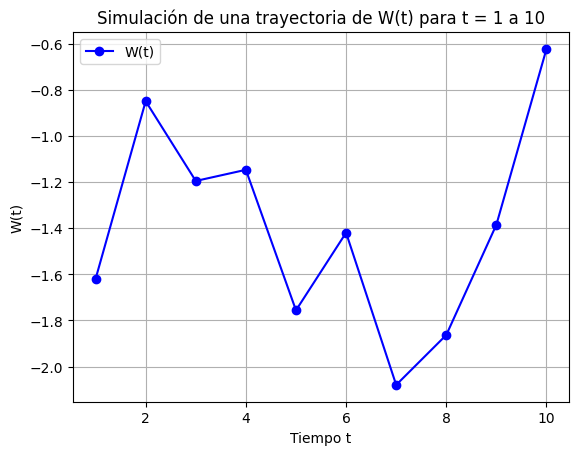

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Definir el número de pasos y el tiempo
n = 10  # Número de pasos (W_1 a W_10)
t = np.arange(1, n + 1)  # Tiempo (1, 2, ..., 10)
W = np.zeros(n)  # Inicializar W_0 = 0

# Paso 2: Simular los incrementos del movimiento browniano
# Simulamos los incrementos como normales N(0, sqrt(1)) para cada intervalo de tiempo.
increments = np.random.normal(0, np.sqrt(1), n)  # Incrementos con media 0 y varianza 1

# Paso 3: Acumular los incrementos para obtener los valores de W_1, W_2, ..., W_10
W = np.cumsum(increments)  # Acumulamos los incrementos

# Paso 4: Imprimir los valores simulados de W_1 a W_10
W_values = {f'W_{i+1}': W[i] for i in range(n)}  # Diccionario con los valores de W_1 a W_10
print(W_values)

# Paso 5: Graficar la trayectoria del movimiento browniano
plt.plot(t, W, marker="o", linestyle="-", color="b", label="W(t)")
plt.title("Simulación de una trayectoria de W(t) para t = 1 a 10")
plt.xlabel("Tiempo t")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

**Ejercicio 2**

Por medio de simulación estime $E(w^2_{Δt}-\Delta_t)$ para $\Delta_t = 0.1,0.01,0.001\ y\ 0.0001$ y grafique $E(w^2_{Δt}-\Delta_t)$ contra $Δt$. ¿Qué observa?

Estimación para Delta t = 0.1: E(W_0.1^2 - Delta t) = 0.0030812613953421705
Estimación para Delta t = 0.01: E(W_0.01^2 - Delta t) = -4.275479095461401e-05
Estimación para Delta t = 0.001: E(W_0.001^2 - Delta t) = 1.521151878073309e-05
Estimación para Delta t = 0.0001: E(W_0.0001^2 - Delta t) = -1.1210515411462278e-06


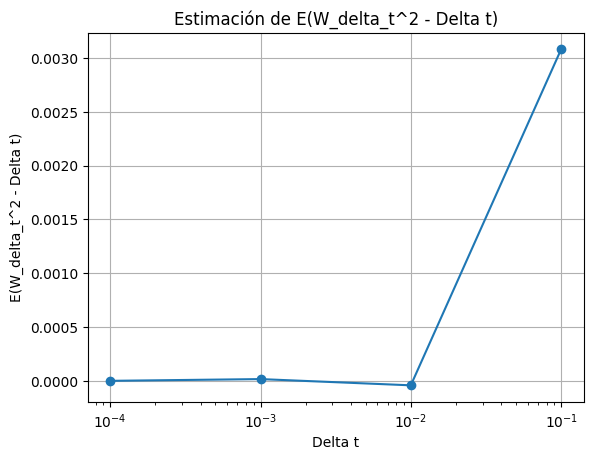

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n_simulaciones = 10000  # número de simulaciones
delta_ts = [0.1, 0.01, 0.001, 0.0001]  # valores de delta t

# Inicializamos los resultados
resultados = []

# Simulamos para cada valor de delta t
for delta_t in delta_ts:
    W_delta_t = np.sqrt(delta_t) * np.random.randn(n_simulaciones)  # Movimiento Browniano
    estimado = np.mean(W_delta_t**2 - delta_t)  # Estimación
    resultados.append(estimado)

    # Imprimir la estimación
    print(f"Estimación para Delta t = {delta_t}: E(W_{delta_t}^2 - Delta t) = {estimado}")

# Graficamos E(W_delta_t^2 - delta_t) contra delta_t
plt.plot(delta_ts, resultados, marker='o')
plt.xscale('log')  # Escala logarítmica para delta_t
plt.xlabel('Delta t')
plt.ylabel('E(W_delta_t^2 - Delta t)')
plt.title('Estimación de E(W_delta_t^2 - Delta t)')
plt.grid(True)
plt.show()

**Observaciones esperadas:**



*   Dado que para un movimiento brawniano $E(w_t^2)=t$, el valor esperado $E(W_{Δt}^2-Δt)$ debería converger a cero conforme a $Δt$ disminuye, ya que el término $ W^2_{Δt}$.
*   Gráficamente, deberíamos observar que la diferencia entre $W^2_{Δt}$ y $Δt$ tiende a hacerse pequeña con valores pequeños de $Δt$.

**Ejercicio 5**

Considere el modelo de Vasicek $dx_t=c(x_t-μ)d_t+σdw_t$ con $μ=10,c=-0.4,σ=0.03 \ y \ x_0=10$. Usando el método de Euler-Murayama, estime $P(Y_5>10.8)$.

Valor promedio de las simulaciones: 9.999983340261192
Probabilidad estimada de que Y_T > 10.08: 0.000646


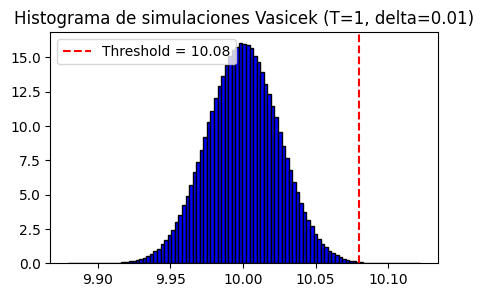

In [9]:
# Considere el modelo de Vasicek con u = 10, c = -.4, o = .03 y x0 = 10
# Usando el método de Euler - Murayama estime p(Y_s > 10.08)
from math import sqrt
from random import gauss
from scipy.stats import norm, lognorm, kstest
from scipy.optimize import minimize
from statistics import stdev, mean
from time import time
import matplotlib.pyplot as plt
from numba import jit
import numpy as np

@jit(nopython=True)
def euler_vasicek(x0, c, u, o, delta, ns, T):
    # Crear un array para almacenar los valores finales de las simulaciones
    l = np.zeros(ns)
    oo = sqrt(delta)  # Factor para el término Browniano
    for i in range(ns):
        x = x0  # Valor inicial para cada simulación
        t = 0  # Tiempo inicial
        while t < T:
            # Aplicar el método de Euler-Maruyama
            x = x + c * (x - u) * delta + o * oo * np.random.normal(0, 1)
            t = t + delta
        # Almacenar el valor final en l
        l[i] = x
    return l

# Parámetros del modelo de Vasicek
c0 = -.4  # Velocidad de reversión
u0 = 10   # Valor medio al que revertir
o0 = 0.03  # Volatilidad
x00 = 10   # Valor inicial (tasa de interés inicial)
delta = 0.01  # Tamaño del paso temporal
ns = 1000000  # Número de simulaciones (ajusté a 1,000,000 para tiempos razonables)
T = 1  # Tiempo total de la simulación (un año)
threshold = 10.08  # Valor umbral para estimar la probabilidad

# Realizar la simulación
l = euler_vasicek(x00, c0, u0, o0, delta, ns, T)

# Estimar la probabilidad de que Y_T > 10.08
prob = np.mean(l > threshold)

# Imprimir el promedio de las simulaciones y la probabilidad
print(f"Valor promedio de las simulaciones: {mean(l)}")
print(f"Probabilidad estimada de que Y_T > {threshold}: {prob}")

# Visualización de resultados
x2 = np.max(l)
x1 = np.min(l)
b = np.linspace(x1, x2, 100)  # Crear 100 bins entre el valor mínimo y máximo

# Dibujar el histograma de los resultados de la simulación
plt.figure(figsize=(5, 3))
plt.hist(l, density=True, bins=b, color='blue', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title(f'Histograma de simulaciones Vasicek (T={T}, delta={delta})')
plt.legend()
plt.show()

**Ejercicio 6**

a)Descargue las tasas de interés de 30 días consecutivos y encuentre los parámetros del modelo de vasicek que mejor se ajuste a los datos por criterio de máxima verosimilitud.

b)Con los párametros obtenidos simule una trayectoria $x_1,x_2,...,x_{30}$ y grafíquela.

Parámetros estimados: mu = 11.502766, sigma = 0.030788, c = -0.490071


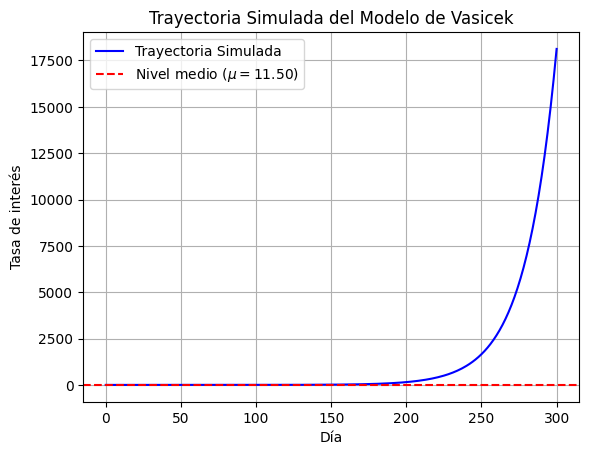

In [11]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
from random import gauss, seed
from math import sqrt, log
import matplotlib.pyplot as plt
from numba import jit

# Parte 1: Estimación de parámetros mediante máxima verosimilitud

@jit(nopython=True)
def euler(x1, mu, sigma, c, delta, ns):
    """
    Función que simula el proceso de Vasicek usando el esquema de Euler.
    Args:
    - x1: valor inicial.
    - mu: valor medio de reversión.
    - sigma: volatilidad.
    - c: velocidad de reversión.
    - delta: paso temporal.
    - ns: número de simulaciones.

    Returns:
    - l: array con los valores simulados.
    """
    oo = sqrt(delta)
    l = np.zeros(ns)
    for i in range(ns):
        x = x1
        t = 0
        while t < 1:  # Simulación hasta t = 1 (para un día completo)
            x = x + c * (mu - x) * delta + sigma * oo * gauss(0, 1)
            t = t + delta
        l[i] = x
    return l

def f(x, ly, delta, ns):
    """
    Función objetivo para estimar los parámetros por máxima verosimilitud.
    Args:
    - x: parámetros [mu, sigma, c].
    - ly: datos observados.
    - delta: paso temporal.
    - ns: número de simulaciones.

    Returns:
    - suma negativa de la log-verosimilitud.
    """
    seed(178341)
    mu = x[0]
    sigma = x[1]
    c = x[2]
    suma = 0
    m = len(ly)
    for i in range(m - 1):
        x1 = ly[i]
        l = euler(x1, mu, sigma, c, delta, ns)
        pdf = gaussian_kde(l)  # Densidad para los valores simulados
        valor = pdf(ly[i + 1])[0]  # Densidad para el siguiente valor real
        if valor < 1e-200:  # Evitar errores por log(0)
            valor = 1e-200
        suma = suma + log(valor)
    return -suma

# Cargar los datos de tasas de interés
file = 'tasas1.txt'
ly = np.loadtxt(file)

# Valores iniciales para los parámetros (mu, sigma, c)
mu0, sigma0, c0 = 11, 0.03, -0.5
delta, ns = 0.1, 1000
x0 = np.array([mu0, sigma0, c0])

# Minimización para encontrar los parámetros óptimos
re = minimize(f, x0, args=(ly, delta, ns), method='Nelder-Mead')
mu_est, sigma_est, c_est = re.x
print(f"Parámetros estimados: mu = {mu_est:.6f}, sigma = {sigma_est:.6f}, c = {c_est:.6f}")

# Parte 2: Simulación de una trayectoria utilizando los parámetros estimados

def simular_trayectoria(mu, sigma, c, x0, delta, t_max):
    """
    Función que simula una trayectoria del modelo de Vasicek usando Euler-Maruyama.
    Args:
    - mu: valor medio de reversión.
    - sigma: volatilidad.
    - c: velocidad de reversión.
    - x0: valor inicial.
    - delta: paso temporal.
    - t_max: tiempo total de la simulación.

    Returns:
    - trayectoria: lista con la trayectoria simulada.
    """
    t = 0
    x = x0
    trayectoria = [x]
    while t < t_max:
        x = x + c * (mu - x) * delta + sigma * sqrt(delta) * gauss(0, 1)
        trayectoria.append(x)
        t = t + delta
    return trayectoria

# Parámetros estimados para la simulación
x0 = ly[-1]  # Usar la última tasa de los datos reales como valor inicial
t_max = 30  # Simulación de 30 días

# Simular una trayectoria de 30 días usando los parámetros estimados
trayectoria = simular_trayectoria(mu_est, sigma_est, c_est, x0, delta, t_max)

# Graficar la trayectoria simulada
plt.plot(range(len(trayectoria)), trayectoria, label="Trayectoria Simulada", color='blue')
plt.axhline(mu_est, color='red', linestyle='--', label=f'Nivel medio ($\mu={mu_est:.2f}$)')
plt.xlabel("Día")
plt.ylabel("Tasa de interés")
plt.title("Trayectoria Simulada del Modelo de Vasicek")
plt.legend()
plt.grid(True)
plt.show()


**Otra forma de solución como lo hizo el profe (Ejericicio 5) :**

In [13]:
from scipy.stats import gaussian_kde, kstest
from scipy.optimize import minimize
from random import gauss, seed
from math import sqrt, log
import numpy as np
from time import time
from numba import jit
@jit(nopython=True)

def euler(x1, u, o, c, delta, ns):
    oo = sqrt(delta)
    l = np.zeros(ns)
    for i in range(ns):
      x = x1
      t = 0
      while t < 1:
        x = x + c * (x - u) * delta + o * oo * gauss(0,1)
        t = t + delta
      l[i] = x
    return l

def f(x, ly, delta, ns):
    seed(178341)
    u = x[0]
    o = x[1]
    c = x[2]
    suma = 0
    m = len(ly)
    for i in range(m-1):
        x1 = ly[i]
        l = euler(x1, u, o, c, delta, ns)
        pdf = gaussian_kde(l)
        valor = pdf(ly[i+1])[0]
        if valor < 1e-200:
          valor = 1e-200
        suma = suma + log(valor)
    print("%10.6f"%u, "%10.6f"%o, "%10.6f"%c, "%10.6f"%suma)
    return -suma

def prueba(x, ly, delta, ns):
    seed(178341)
    u = x[0]
    o = x[1]
    c = x[2]
    m = len(ly)
    ll = []
    for i in range(m-1):
        x1 = ly[i]
        l = euler(x1, u, o, c, delta, ns)
        pdf = gaussian_kde(l)
        x1 = min(l)/2
        valor = pdf.integrate_box_1d(x1, ly[i+1])
        ll.append(valor)
    ks = kstest(ll, 'uniform', args=(0,1))
    return ks[1]

t1 = time()
ly = np.loadtxt('tasas1.txt')
u0 = 11
o0 = .03
c0 = -.5
delta = .1
ns = 10000
x0 = np.array([u0, o0, c0])
re0 = minimize(f, x0, args = (ly, delta, ns), method = 'Nelder-Mead', options = {'xatol':1e-5, 'fatol':20})
print(re0)
pv = prueba(re0.x, ly, delta, ns)
print("%10.4f"%pv)
t2 = time()
print((t2-t1)/69)

 11.000000   0.030000  -0.500000 -43665.252809
 11.550000   0.030000  -0.500000 240.103500
 11.000000   0.031500  -0.500000 -38920.125961
 11.000000   0.030000  -0.525000 -45362.729701
 11.366667   0.031000  -0.475000  39.900342
 11.611111   0.031667  -0.483333 123.876744
 12.018519   0.030278  -0.472222 -39462.101858
 11.254630   0.031194  -0.493056 -701.304867
 11.763889   0.030583  -0.479167 -910.541858
 11.381944   0.031042  -0.489583  80.599323
 11.662037   0.030806  -0.506944 -85.838208
 11.440509   0.030951  -0.482986 219.007062
 11.685802   0.030704  -0.487963 -169.428231
 11.457909   0.030957  -0.489178 242.574052
 11.354501   0.029606  -0.498110 -52.633138
 11.546959   0.031151  -0.487027 243.333489
 11.596069   0.030454  -0.501151 149.145338
 11.479399   0.030827  -0.487527 261.991958
 11.439511   0.031957  -0.475822 218.663443
 11.522378   0.030489  -0.493955 264.924332
 11.574581   0.030688  -0.489829 201.243841
 11.487077   0.030890  -0.489341 265.864654
 11.445611   0.03

**Ejercicio 9**

Considere el modelo de Cox- Ingerlson-Ross $dx_t=c(x_t-μ)dt+σ \sqrt{x_t}dw_t$ con $μ=8, \ c=-0.3,\ σ=0.04 \ y \ x_0=8.$ Usando el método de Euler-Murayama estime $V(X_5)$.


V(x_5) estimado: 8.000334324839185


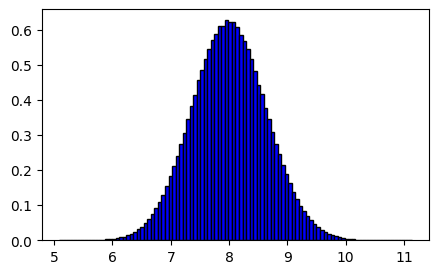

In [12]:
#Método de Euler-Murayama
from math import sqrt
from random import gauss
from scipy.optimize import minimize
from statistics import stdev, mean
from time import time
import matplotlib.pyplot as plt
from numba import jit
import numpy as np

@jit(nopython=True)

def euler(x0,u,c,o,delta,nr,T):
  l=np.zeros(nr)
  oo = sqrt(delta)
  for i in range(nr):
    x = x0
    t = 0
    while t<T:
      x = x + c*(u-x)*delta + o*sqrt(x)*oo*gauss(0,1)
      x=max(x,0)
      t = t+delta
    l[i] = x
  return l
u = 8
c=-0.3
o = .04
x00 = 8
delta = .01
nr = 1000000
T = 5

l = euler(x00,u,c,o,delta,nr,T)
v_x5 = mean(l)
print(f"V(x_5) estimado: {v_x5}")
x2 = np.max(l)
x1 = np.min(l)
x = x1
b = []

while x<x2:
  b.append(x)
  x = x + (x2-x1)/100

plt.figure(figsize=(5,3))
plt.hist(l,density = 1, bins = b,color='blue',edgecolor = 'black')
plt.show()